In [1]:
import sys
sys.path.append('../..')

import eeg_decoder
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [3]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [4]:
time_window = 25 
time_step = 25
trial_average = 15 
n_splits = 1000
group_dict = OrderedDict([('SS1',ss1),('SS2',ss3)])
wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [5]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    ori_idx = ydata>15
    xdata_color,ydata_color = xdata[~ori_idx], ydata[~ori_idx]
    xdata_ori,ydata_ori = xdata[ori_idx], ydata[ori_idx]

    xdata_color,ydata_color = wrangl.group_labels(xdata_color,ydata_color)
    xdata_ori,ydata_ori = wrangl.group_labels(xdata_ori,ydata_ori)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_custom_split(xdata_ori,xdata_color,ydata_ori,ydata_color,test_size=.3):
        
        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [6]:
interp_ori_to_color = eeg_decoder.Interpreter(clfr,subtitle='ori_to_color')
interp_ori_to_color.save_results(timestamp=False)

In [5]:
interp_ori_to_color = eeg_decoder.Interpreter(clfr,subtitle='ori_to_color')
interp_ori_to_color.load_results('ori_to_color')

Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192 1216]
Saving output\figures\ori_to_coloracc.pdf
Saving output\figures\ori_to_coloracc.png


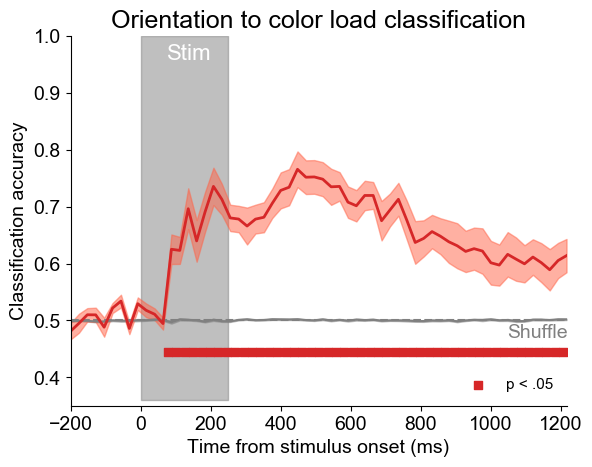

Mean delay accuracy: 0.6687569262038775
Mean delay S.D.: 0.052180654237267025


In [15]:
interp_ori_to_color.plot_acc(
    significance_testing=True,
    savefig=True, 
    ylim=[0.35,1],
    chance_text_xy=[.88,.223], 
    stim_text_xy=[.195,.98],
    title='Orientation to color load classification')

# Color to Orientation

In [8]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    ori_idx = ydata>15
    xdata_color,ydata_color = xdata[~ori_idx], ydata[~ori_idx]
    xdata_ori,ydata_ori = xdata[ori_idx], ydata[ori_idx]

    xdata_color,ydata_color = wrangl.group_labels(xdata_color,ydata_color)
    xdata_ori,ydata_ori = wrangl.group_labels(xdata_ori,ydata_ori)

    for X_train_all, X_test_all, y_train, y_test in wrangl.bin_and_custom_split(xdata_color,xdata_ori,ydata_color,ydata_ori,test_size=.3):
        
        X_train_all, X_test_all, y_train, y_test = wrangl.balance_data(X_train_all, X_test_all, y_train, y_test)
        y_test_shuffle = np.random.permutation(y_test)

        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [9]:
interp_color_to_ori = eeg_decoder.Interpreter(clfr,subtitle='color_to_ori')
interp_color_to_ori.save_results(timestamp=False)

In [16]:
interp_color_to_ori = eeg_decoder.Interpreter(clfr,subtitle='color_to_ori')
interp_color_to_ori.load_results('color_to_ori')

Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192 1216]
Saving output\figures\color_to_oriacc.pdf
Saving output\figures\color_to_oriacc.png


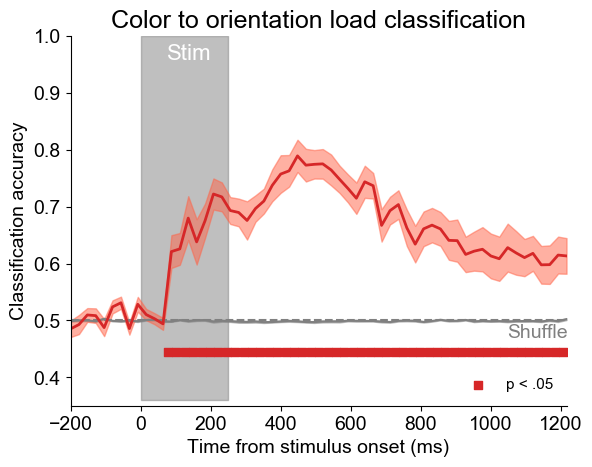

Mean delay accuracy: 0.6803129768605378
Mean delay S.D.: 0.0592582158242798


In [17]:
interp_color_to_ori.plot_acc(
    significance_testing=True,
    savefig=True, 
    ylim=[0.35,1],
    chance_text_xy=[.88,.223], 
    stim_text_xy=[.195,.98],
    title='Color to orientation load classification')

# Within-Feature compared to Across-Feature

## Color

In [19]:
interp_color = eeg_decoder.Interpreter()
interp_color.combine_interps(['color','ori_to_color'], overwrite_current_interp=True)

Within-color mean delay accuracy: 0.6880346310193871
Within-color mean delay S.D.: 0.05668903038227266
Orientation-to-color mean delay accuracy: 0.6687569262038775
Orientation-to-color mean delay S.D.: 0.052180654237267025
mean delay accuracy: 0.6687569262038775
mean delay S.D.: 0.052180654237267025
Saving output\figures\accwithin_color_and_ori_to_color.pdf
Saving output\figures\accwithin_color_and_ori_to_color.png


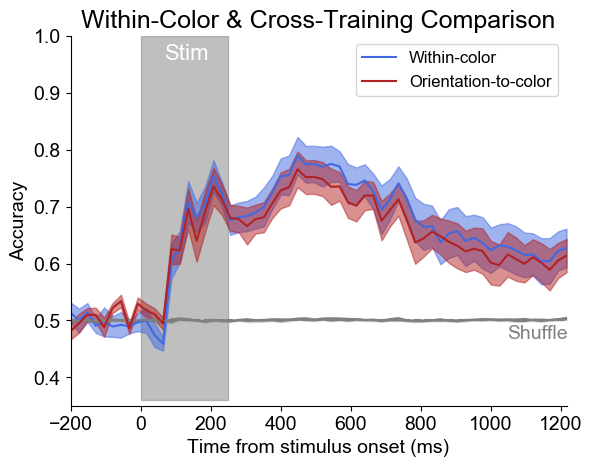

In [21]:
interp_color.plot_acc_compare_subset(
    subset_list=['Within-color','Orientation-to-color'],
    ylim=[.35,1], 
    chance_text_xy=[.88,.22],
    stim_text_xy=[.19,.98],
    chance=.5, 
    significance_testing=True,
    subtitle='within_color_and_ori_to_color',
    title='Within-Color & Cross-Training Comparison',
    savefig=True)

## Orientation 

In [22]:
interp_ori = eeg_decoder.Interpreter()
interp_ori.combine_interps(['orientation','color_to_ori'])

Within-orientation mean delay accuracy: 0.718046669793621
Within-orientation mean delay S.D.: 0.06072034958284158
Color-to-orientation mean delay accuracy: 0.6803129768605378
Color-to-orientation mean delay S.D.: 0.0592582158242798
mean delay accuracy: 0.6803129768605378
mean delay S.D.: 0.0592582158242798
Saving output\figures\accwithin_ori_and_color_to_ori.pdf
Saving output\figures\accwithin_ori_and_color_to_ori.png


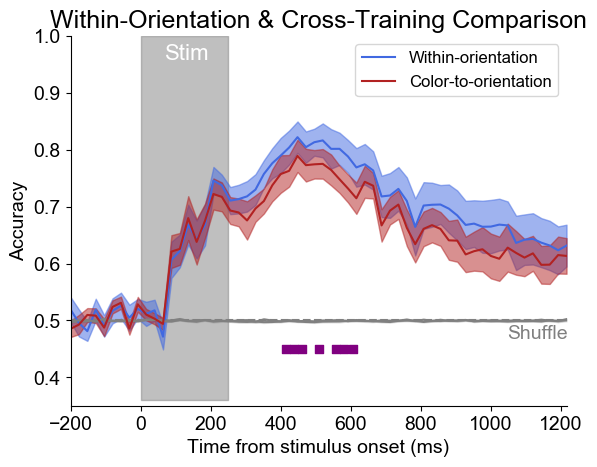

In [23]:
interp_ori.plot_acc_compare_subset(
    subset_list=['Within-orientation','Color-to-orientation'],
    ylim=[.35,1], 
    chance_text_xy=[.88,.22],
    stim_text_xy=[.19,.98],
    chance=.5, 
    significance_testing=True,
    subtitle='within_ori_and_color_to_ori',
    title='Within-Orientation & Cross-Training Comparison',
    savefig=True)